
# Iris flower extended data set - Classification using different Algorithms

In these exercises we are going to do a similar job as the last time. However, now we are going to use a different dataset and we are going to use different algorithms.

Instead of predicting the species of a flower, we are going to predict the price of each flower.



a) Create a new notebook

b) Read the data from the CSV file and check the data using the head() and describe() functions, as well as other pandas functions that you think are useful.

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


iris_data = pd.read_csv('iris-data2.csv')
#iris_data.head()
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


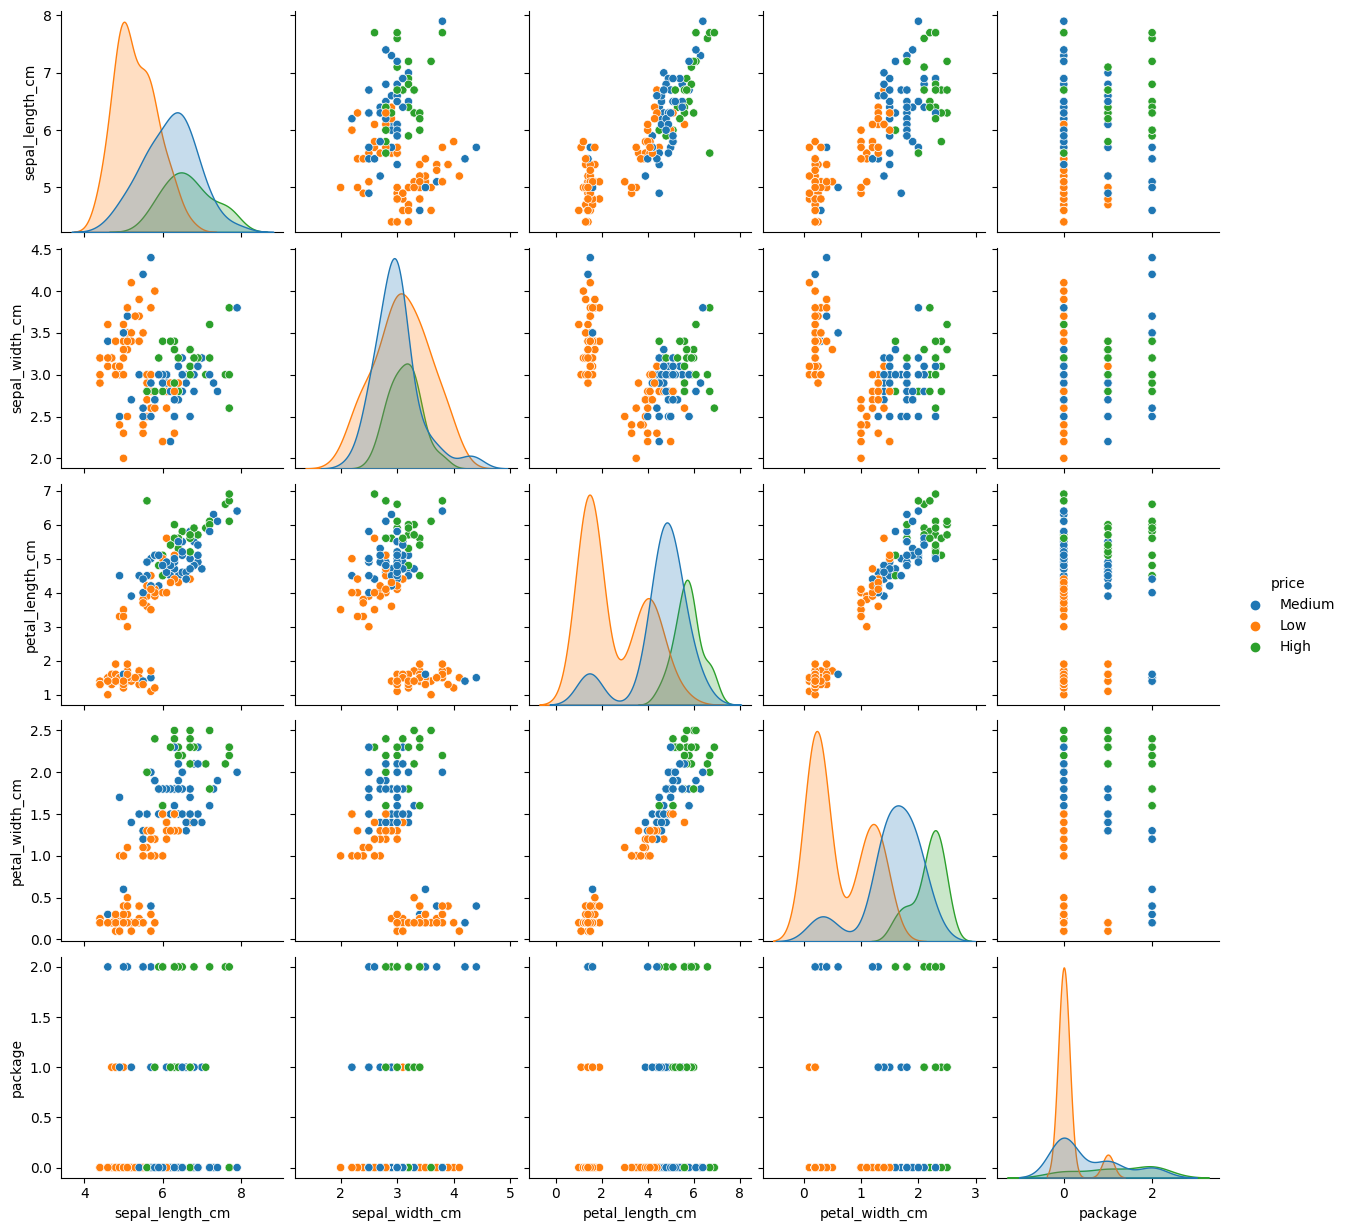

In [15]:
sb.pairplot(iris_data.dropna(), hue='price')

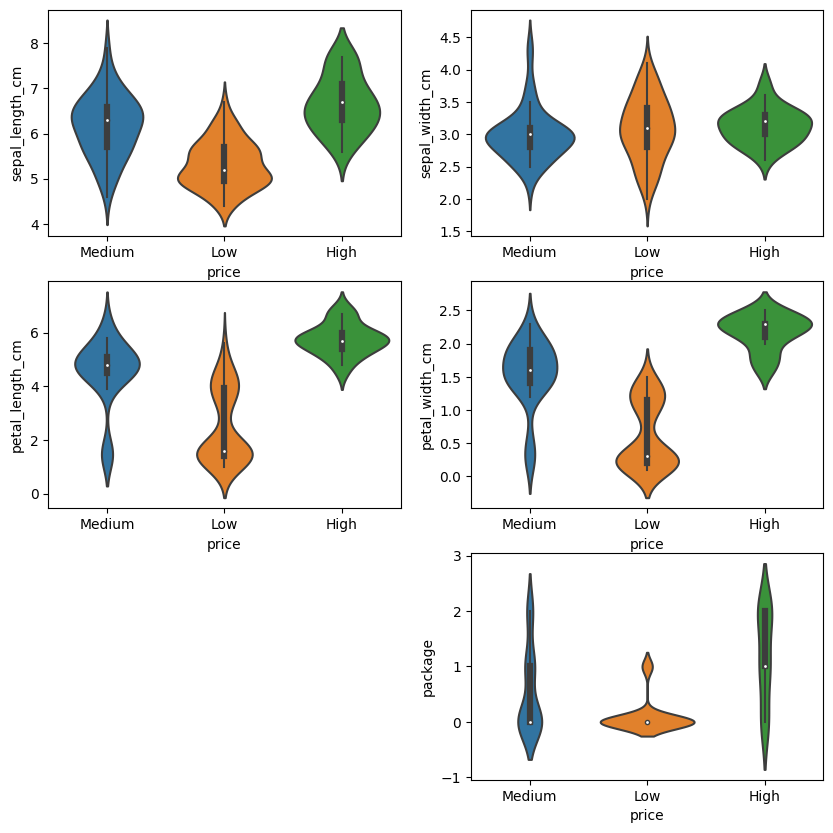

In [16]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if (column == 'price') or (column == 'iris_type'):
        continue
    plt.subplot(3, 2, column_index + 1)
    sb.violinplot(x='price', y=column, data=iris_data)

c) Using only the attribute sepal_length, sepal_width, petal_length and petal_width, create a new decision tree model to the data using holdout with 75% for training and 25% for testing/holdout.

In [63]:
# We can extract the data in this format from pandas like this:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data['price'].values

(training_inputs,
    testing_inputs,
    training_prices,
    testing_prices) = train_test_split(all_inputs, all_labels, test_size=0.25)


In [18]:
# Create the classifier using the DesicionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier = decision_tree_classifier.fit(training_inputs, training_prices)

# Validate the classifier on the testing set using classification accuracy
predictions = decision_tree_classifier.predict(testing_inputs)

# Print the accuracy from the testing data.
print("Accuracy: {0:.2f}%".format(accuracy_score(testing_prices, predictions) * 100))


Accuracy: 68.42%


Now using grid and cross validation, in order to improve our previous model:

In [19]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6],
                  'max_features': [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=10)
grid_search = grid_search.fit(all_inputs, all_labels)

predictions = grid_search.predict(testing_inputs)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8242857142857144
Best parameters: {'max_depth': 2, 'max_features': 3}


d) Analyse the accuracy, precision, recall and f-measure achieved.

e) Create and analyse the confusion matrix of the results.

              precision    recall  f1-score   support

        High       0.75      0.43      0.55         7
         Low       0.75      0.75      0.75        12
      Medium       0.68      0.79      0.73        19

    accuracy                           0.71        38
   macro avg       0.73      0.66      0.68        38
weighted avg       0.72      0.71      0.70        38



<Axes: >

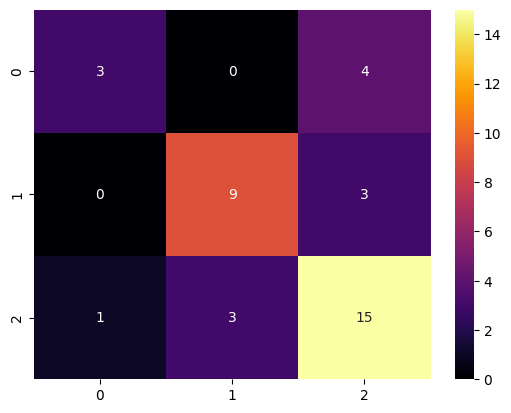

In [20]:
# Analyse the accuracy, precision, recall and f-measure acheieved by the classifier
print(classification_report(testing_prices, predictions))

# Plot the confusion matrix
cm = confusion_matrix(testing_prices, predictions)

# All the colors available in seaborn are:
# YlGnBu, YlOrRd, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGn, BuGn, PuBuGn, BuPu, RdBu, PuRd, RdGy, RdYlBu, Spectral, RdYlGn, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c
# magma, plasma, inferno, viridis, cividis 

# Plot the confusion matrix
sb.heatmap(cm, annot=True, fmt='d', cmap='inferno')

f) Using only the attribute sepal_length, sepal_width, petal_length and petal_width, fit a simple nearest neighbour model to the data using holdout with 75% for training and 25% for testing/holdout.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

knn = knn.fit(training_inputs, training_prices)

predictions = knn.predict(testing_inputs)

print("Accuracy: {0:.2f}%".format(accuracy_score(testing_prices, predictions) * 100))



Accuracy: 73.68%


Now using grid and cross validation, in order to improve our previous model:

In [22]:

parameter_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

grid_search = GridSearchCV(knn, param_grid=parameter_grid, cv=10)

grid_search = grid_search.fit(all_inputs, all_labels)

predictions = grid_search.predict(testing_inputs)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.770952380952381
Best parameters: {'n_neighbors': 7}


g) Analyze the accuracy, precision, recall and f-measure achieved and the confusion matrix.

              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       0.75      0.75      0.75        12
      Medium       0.79      0.79      0.79        19

    accuracy                           0.79        38
   macro avg       0.80      0.80      0.80        38
weighted avg       0.79      0.79      0.79        38



<Axes: >

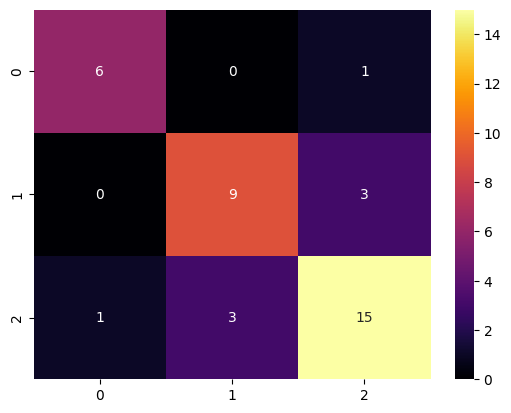

In [23]:
print(classification_report(testing_prices, predictions))

cm = confusion_matrix(testing_prices, predictions)

sb.heatmap(cm, annot=True, fmt='d', cmap='inferno')


h) Use two different methods for balancing the dataset and repeat the previous analyses.

In [69]:
# Balance the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Create the random under sampler
rus = RandomUnderSampler()

# Fit the random under sampler to the data
X_rus, y_rus = rus.fit_resample(all_inputs, all_labels)

print('The number of classes before fit: {}'.format(len(all_labels)))
print('The number of classes after fit of undersampler: {}'.format(len(y_rus)))

# Create the random over sampler
ros = RandomOverSampler()

# Fit the random over sampler to the data
X_ros, y_ros = ros.fit_resample(all_inputs, all_labels)

print('The number of classes after fit of oversampler: {}'.format(len(y_ros)))

# Split the data into training and testing sets
(training_inputs_rus,
    testing_inputs_rus,
    training_prices_rus,
    testing_prices_rus) = train_test_split(X_rus, y_rus, test_size=0.25)

(training_inputs_ros,
    testing_inputs_ros,
    training_prices_ros,
    testing_prices_ros) = train_test_split(X_ros, y_ros, test_size=0.25)


The number of classes before fit: 149
The number of classes after fit of undersampler: 75
The number of classes after fit of oversampler: 213


Now, let's repeat the algorithms used before but with the balancing of the dataset:

In [135]:
def evaluate_model(train_in, train_out, test_in, test_out, model):
    model = model.fit(train_in, train_out)
    predictions = model.predict(test_in)
    return accuracy_score(test_out, predictions) * 100, confusion_matrix(test_out, predictions)


# Create the classifier using the DesicionTreeClassifier
accuracy_rus, cm = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, DecisionTreeClassifier())
accuracy_ros, cm = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, DecisionTreeClassifier())
print('Decision Tree Classifier Undersample: {:.2f}%'.format(accuracy_rus))
print('Decision Tree Classifier Oversample: {:.2f}%'.format(accuracy_ros))

# Create the classifier using the KNeighborsClassifier
accuracy_rus, cm = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, KNeighborsClassifier())
accuracy_ros, cm = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, KNeighborsClassifier())
print('K Neighbors Classifier Undersample: {:.2f}%'.format(accuracy_rus))
print('K Neighbors Classifier Oversample: {:.2f}%'.format(accuracy_ros))


Decision Tree Classifier Undersample: 84.21%
Decision Tree Classifier Oversample: 96.30%
K Neighbors Classifier Undersample: 94.74%
K Neighbors Classifier Oversample: 90.74%


After trying it out a lot of times, the oversampling seems to get the best results, but sometimes the undersampling gets better results.

i) Using all the attributes available, and the balanced dataset, fit distinct models such as Nearest Neighbor, Decision Trees, SVMs and Neural Networks to the data and try different configuration parameters, using holdout with 75% for training.

Decision Tree Classifier: 81.58%
Decision Tree Classifier Undersample: 84.21%
Decision Tree Classifier Oversample: 87.04%


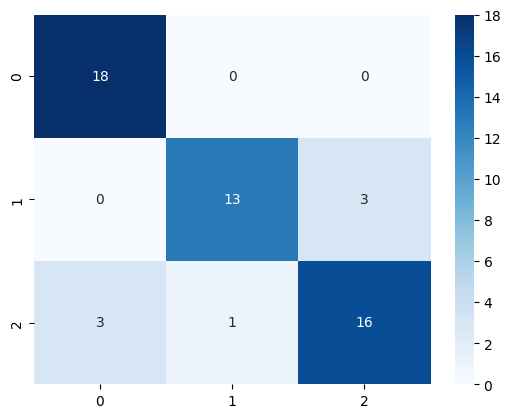

K Neighbors Classifier: 86.84%
K Neighbors Classifier Undersample: 84.21%
K Neighbors Classifier Oversample: 83.33%


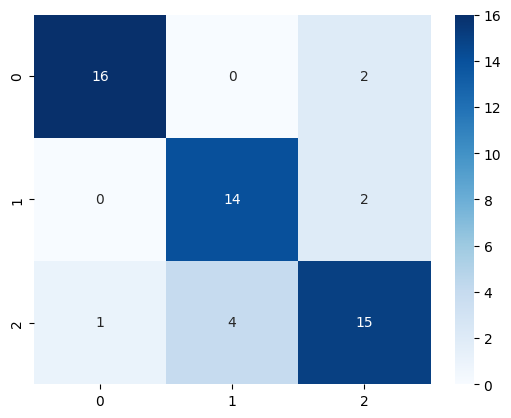

Support Vector Classifier: 84.21%
Support Vector Classifier Undersample: 84.21%
Support Vector Classifier Oversample: 81.48%


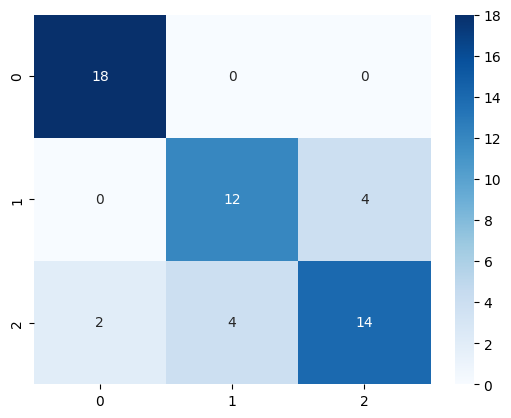

/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks: 92.11%
Neural Networks Undersample: 84.21%
Neural Networks Oversample: 92.59%


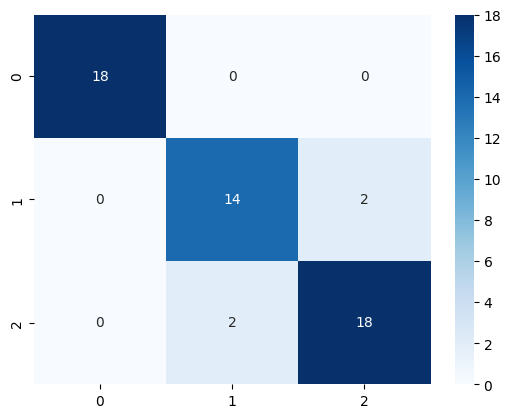

In [138]:
# Include package as a feature
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'package']].values
all_labels = iris_data['price'].values

rus = RandomUnderSampler()
ros = RandomOverSampler()

X_rus, y_rus = rus.fit_resample(all_inputs, all_labels)
X_ros, y_ros = ros.fit_resample(all_inputs, all_labels)

(training_inputs_rus,
    testing_inputs_rus,
    training_prices_rus,
    testing_prices_rus) = train_test_split(X_rus, y_rus, test_size=0.25)

(training_inputs_ros,
    testing_inputs_ros,
    training_prices_ros,
    testing_prices_ros) = train_test_split(X_ros, y_ros, test_size=0.25)

(training_inputs,
    testing_inputs,
    training_prices,
    testing_prices) = train_test_split(all_inputs, all_labels, test_size=0.25)



# Create the classifier using the DesicionTreeClassifier
accuracy, cm = evaluate_model(training_inputs, training_prices, testing_inputs, testing_prices, DecisionTreeClassifier())
accuracy_rus, cm_rus = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, DecisionTreeClassifier())
accuracy_ros, cm_ros = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, DecisionTreeClassifier())

print('Decision Tree Classifier: {:.2f}%'.format(accuracy))
print('Decision Tree Classifier Undersample: {:.2f}%'.format(accuracy_rus))
print('Decision Tree Classifier Oversample: {:.2f}%'.format(accuracy_ros))

sb.heatmap(cm_ros, annot=True, cmap='Blues', fmt='d')
plt.show()

# Create the classifier using the KNeighborsClassifier
accuracy, cm = evaluate_model(training_inputs, training_prices, testing_inputs, testing_prices, KNeighborsClassifier())
accuracy_rus, cm_rus = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, KNeighborsClassifier())
accuracy_ros, cm_ros = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, KNeighborsClassifier())

print('K Neighbors Classifier: {:.2f}%'.format(accuracy))
print('K Neighbors Classifier Undersample: {:.2f}%'.format(accuracy_rus))
print('K Neighbors Classifier Oversample: {:.2f}%'.format(accuracy_ros))

sb.heatmap(cm_ros, annot=True, cmap='Blues', fmt='d')
plt.show()

# Create the classifier using Support Vector Classifier
accuracy, cm = evaluate_model(training_inputs, training_prices, testing_inputs, testing_prices, SVC())
accuracy_rus, cm_rus = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, SVC())
accuracy_ros, cm_ros = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, SVC())

print('Support Vector Classifier: {:.2f}%'.format(accuracy))
print('Support Vector Classifier Undersample: {:.2f}%'.format(accuracy_rus))
print('Support Vector Classifier Oversample: {:.2f}%'.format(accuracy_ros))

sb.heatmap(cm_ros, annot=True, cmap='Blues', fmt='d')
plt.show()

# Create the classifier using Neural Networks
accuracy, cm = evaluate_model(training_inputs, training_prices, testing_inputs, testing_prices, MLPClassifier(max_iter=1000))
accuracy_rus, cm_rus = evaluate_model(training_inputs_rus, training_prices_rus, testing_inputs_rus, testing_prices_rus, MLPClassifier(max_iter=1000))
accuracy_ros, cm_ros = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, MLPClassifier(max_iter=1000))

print('Neural Networks: {:.2f}%'.format(accuracy))
print('Neural Networks Undersample: {:.2f}%'.format(accuracy_rus))
print('Neural Networks Oversample: {:.2f}%'.format(accuracy_ros))

sb.heatmap(cm_ros, annot=True, cmap='Blues', fmt='d')
plt.show()






k) l) m) Let's pick the best model, which in this case was the Neural Network, and try to improve it using grid and cross validation.

/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks Oversample: 98.15%


<Axes: >

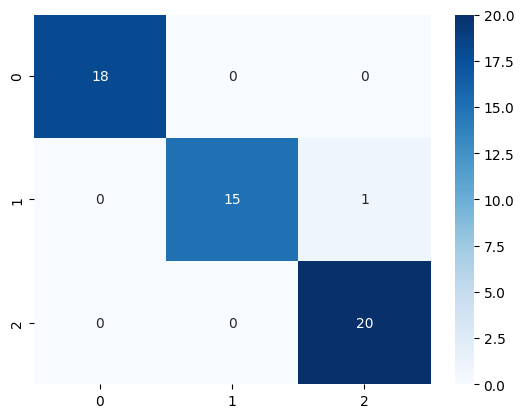

In [142]:
# I don't have enough knowledge to understand all these parameters 
# but I can understand some of them to a certain extent
# I just tried them out because co pilot sugested them
parameter_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20), (30, 30, 30)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200,500,1000]
}

#grid_search = GridSearchCV(MLPClassifier(), parameter_grid, cv=5)

#grid_search = grid_search.fit(training_inputs_ros, training_prices_ros)

#print('Best score: {}'.format(grid_search.best_score_))
#print('Best parameters: {}'.format(grid_search.best_params_))


# Best score: 0.95625
# Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'adaptive', 'solver': 'adam'}

#Best score: 0.9625
#Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'adaptive', 'solver': 'adam'}

# Best score: 0.9875
# Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}

# Create the classifier using Neural Networks

accuracy_ros, cm_ros = evaluate_model(training_inputs_ros, training_prices_ros, testing_inputs_ros, testing_prices_ros, MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive', max_iter=500, solver='adam'))

print('Neural Networks Oversample: {:.2f}%'.format(accuracy_ros))

sb.heatmap(cm_ros, annot=True, cmap='Blues', fmt='d')

